In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(112, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 112)         56560     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 112)         0         
_________________________________________________________________
flatten (Flatten)            (None, 112)               0

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.1959 - accuracy: 0.9391 - val_loss: 0.0780 - val_accuracy: 0.9769
Epoch 2/5
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 3/5
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0470 - val_accuracy: 0.9864
Epoch 4/5
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0448 - val_accuracy: 0.9859
Epoch 5/5
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0543 - val_accuracy: 0.9836


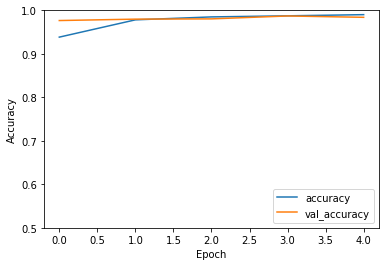

In [7]:
plt.figure()
plt.plot(x1, label='accuracy')
plt.plot(x2, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()



In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)